In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
df = pd.read_csv('kyphosis.csv')

In [8]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


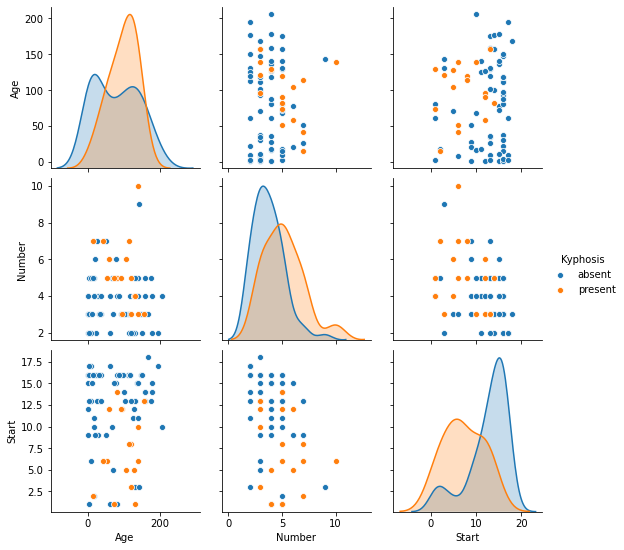

In [10]:
sns.pairplot(df, hue = 'Kyphosis')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Kyphosis', axis = 1)

In [13]:
y = df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
predictions = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(confusion_matrix(y_test, predictions))

[[14  4]
 [ 6  1]]


In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.70      0.78      0.74        18
     present       0.20      0.14      0.17         7

    accuracy                           0.60        25
   macro avg       0.45      0.46      0.45        25
weighted avg       0.56      0.60      0.58        25



In [22]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators = 300)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [35]:
rfc_pred = rfc.predict(X_test)

In [36]:
print(confusion_matrix(y_test, rfc_pred))

[[18  0]
 [ 7  0]]


In [37]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.72      1.00      0.84        18
     present       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



/Users/tweedles/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Visualizing the Tree

In [40]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

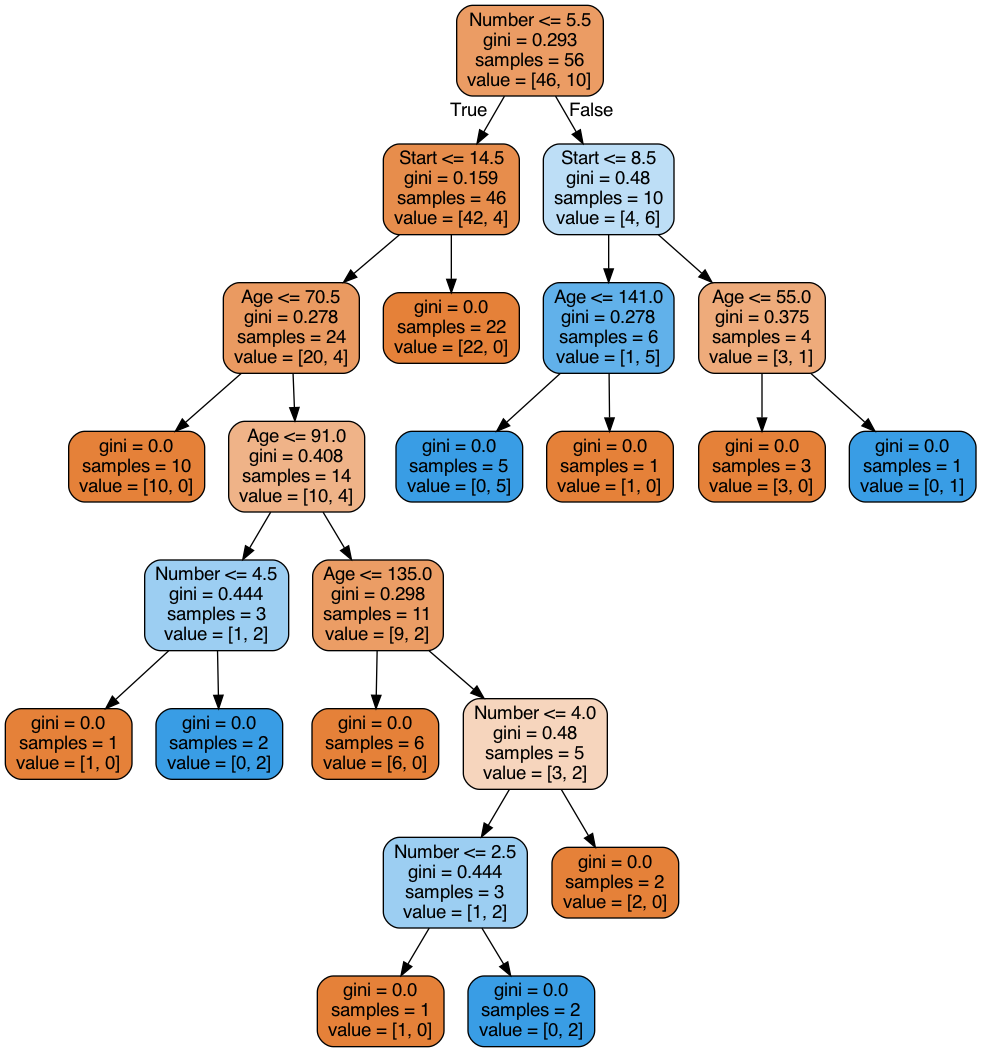

In [45]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names = features, filled = True, rounded = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())